<a href="https://colab.research.google.com/github/mazensomran/repo1/blob/main/K_means_for_clustring_samples_tile_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sys
import cv2
import os
from scipy import ndimage as nd
from skimage.filters import roberts, sobel, scharr, prewitt

In [ ]:
img_path = "/content/drive/MyDrive/train/"
img_path1 = "/content/drive/MyDrive/test/"

X_train =[]
X_train1 =[]
y_train = []
X_test = []
X_test1= []
y_test = []

In [ ]:
print(len(os.listdir(img_path)))
print(len(os.listdir(img_path1)))

276
38


In [ ]:
for image in os.listdir(img_path):  # iterate through each file

    input_img = cv2.imread(img_path + image)  # Read images
    img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (105, 105))
    X_train.append(img)

In [ ]:
for image in os.listdir(img_path1):  # iterate through each file

    input_img = cv2.imread(img_path1 + image)  # Read images
    img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (105, 105))
    X_test.append(img)

#Training data for binary clustring

In [ ]:
for image in os.listdir(img_path):  # iterate through each file
    if image.split('.')[0][:3] == 'cra':
      y_train.append(1)
    elif image.split('.')[0][:3] == 'oil':
      y_train.append(2)
    elif image.split('.')[0][:3] == 'glu':
      y_train.append(3)
    elif image.split('.')[0][:3] == 'gra':
      y_train.append(4)
    elif image.split('.')[0][:3] == 'rou':
      y_train.append(5)
    else:
        y_train.append(0)
    input_img = cv2.imread(img_path + image)  # Read images
    img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (105, 105))
    X_train1.append(img)

In [ ]:
for image in os.listdir(img_path1):  # iterate through each file

    if image.split('.')[0][:3] == 'cra':
      y_test.append(1)
    elif image.split('.')[0][:3] == 'oil':
      y_test.append(2)
    elif image.split('.')[0][:3] == 'glu':
      y_test.append(3)
    elif image.split('.')[0][:3] == 'gra':
      y_test.append(4)
    elif image.split('.')[0][:3] == 'rou':
      y_test.append(5)
    else:
        y_test.append(0)

    input_img = cv2.imread(img_path1 + image)  # Read images
    img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (105, 105))
    X_test1.append(img)

In [ ]:
X_train= np.array(X_train)
X_train1= np.array(X_train1)
y_train= np.array(y_train)
X_test= np.array(X_test)
X_test1= np.array(X_test1)
y_test= np.array(y_test)

In [ ]:
def pixel_value(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file
        #print(image)

        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.

        input_img = x_train[image, :,:]
        img = input_img

        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values
        #Append features from current image to the dataset
        image_dataset = pd.concat([image_dataset,df])

    return image_dataset

In [ ]:
Pixel_val_feature = pixel_value(X_train)
n_features = Pixel_val_feature.shape[1]
Pixel_val_feature = np.expand_dims(Pixel_val_feature, axis=0)
Pixel_val_train_data = np.reshape(Pixel_val_feature, (X_train.shape[0], -1))

In [ ]:
kmeans1 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans1.fit(Pixel_val_train_data)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
print(kmeans1.labels_)

[1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0
 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
n =0
m = 0
for i in kmeans1.labels_ :
  if i == 1:
    n +=1
  else :
    m += 1
print("n = ",n,"m = ",m)

n =  152 m =  124


In [ ]:
print(len(kmeans1.labels_ ))

276


In [ ]:
kmeans2 = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans2.fit(Pixel_val_train_data)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [ ]:
print(kmeans2.labels_)

[1 2 2 2 1 1 1 3 1 2 1 2 1 1 2 1 2 2 2 3 3 1 2 1 2 1 2 2 2 1 2 2 2 1 2 2 2
 2 2 2 2 2 3 2 2 1 2 2 2 3 2 1 2 1 2 0 1 5 1 2 1 1 1 2 3 0 3 3 2 1 3 3 3 3
 1 4 3 4 1 3 3 1 1 1 1 3 1 3 4 4 1 1 1 1 3 3 3 4 3 4 3 3 3 1 1 3 4 3 2 3 2
 1 4 3 2 3 1 3 2 3 1 2 1 3 3 3 3 3 3 4 1 1 3 1 3 3 1 2 2 3 1 3 3 3 3 1 3 3
 1 2 3 3 1 2 3 1 4 3 2 2 1 1 3 3 1 3 2 2 2 1 0 1 2 2 2 3 2 1 5 2 3 3 2 3 1
 1 2 3 1 1 1 1 2 3 3 1 3 3 2 3 3 1 1 3 3 2 3 1 3 1 1 3 3 1 1 2 2 1 3 2 1 1
 2 2 3 1 1 2 1 3 2 1 2 2 2 2 3 2 2 1 3 1 2 1 3 2 3 3 3 2 2 2 3 2 3 2 2 1 1
 2 1 2 1 2 1 3 1 3 3 4 4 3 3 3 3 3]


In [ ]:
def plot_images(images, labels, n_cols=5):
    images = images.reshape(-1, 105, 105)
    n_rows = (len(images) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(images, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

Cluster 0


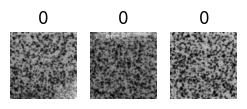

Cluster 1


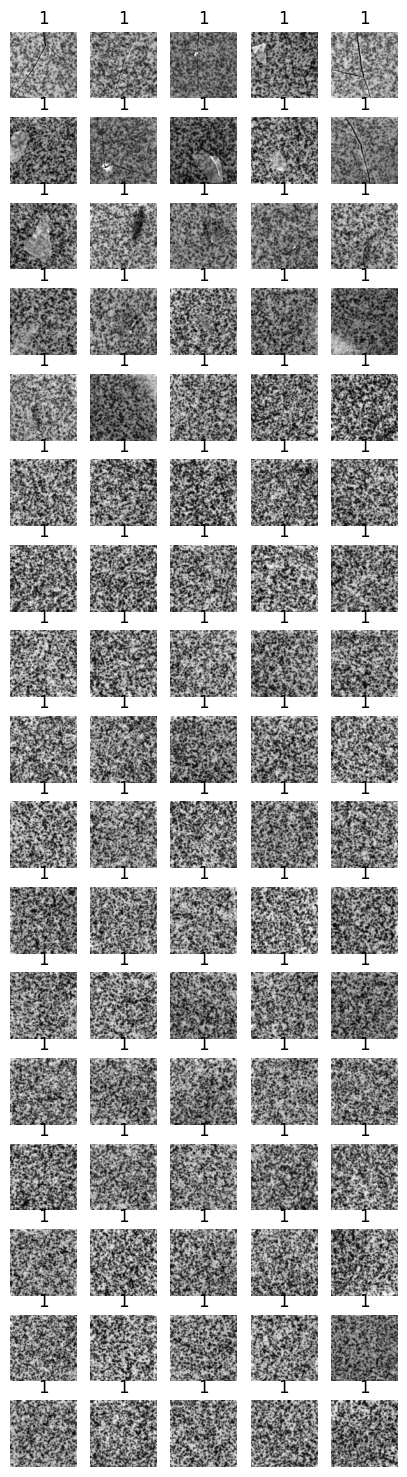

Cluster 2


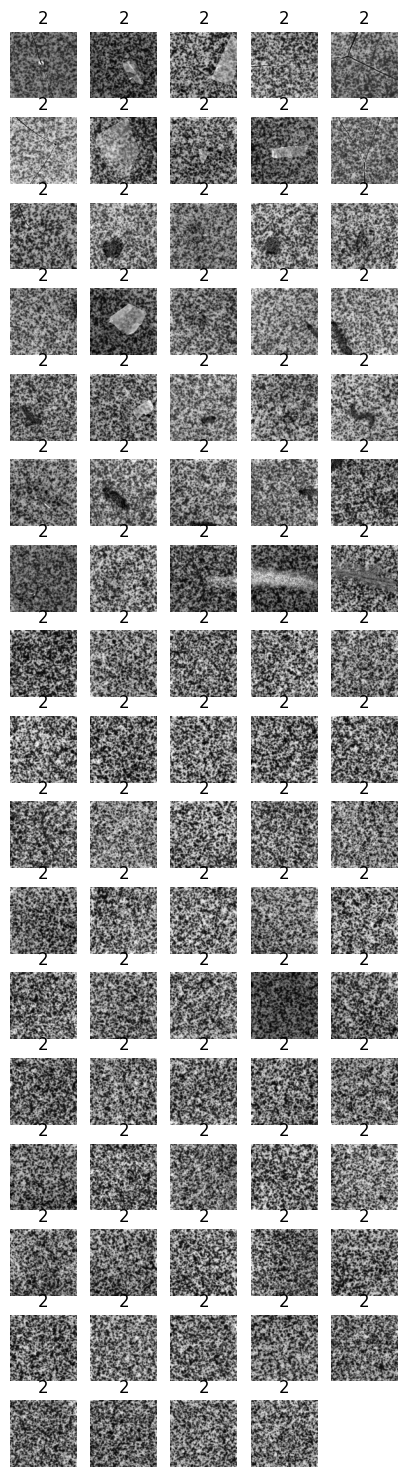

Cluster 3


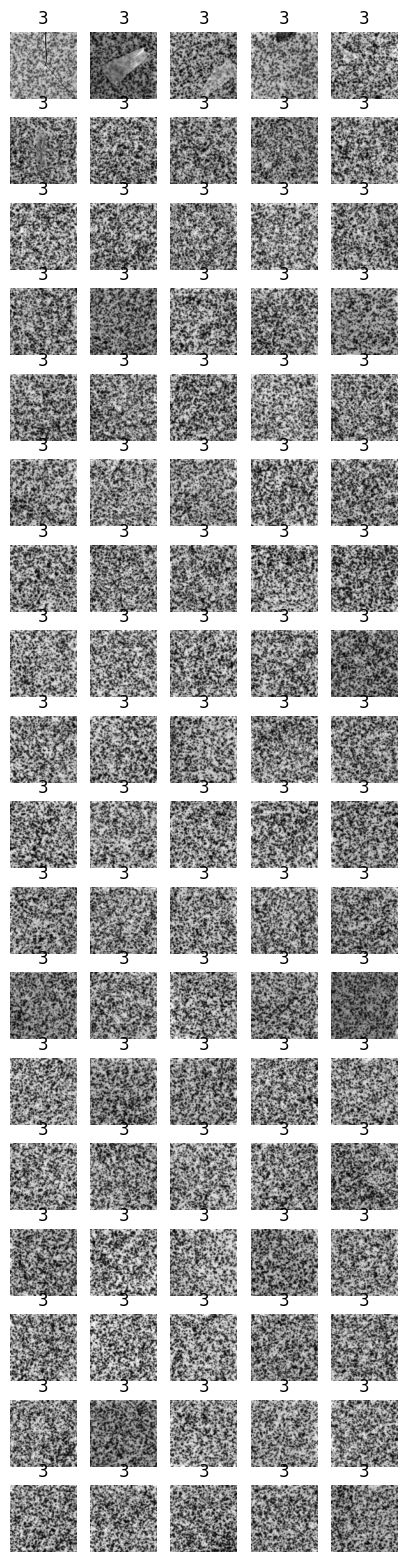

Cluster 4


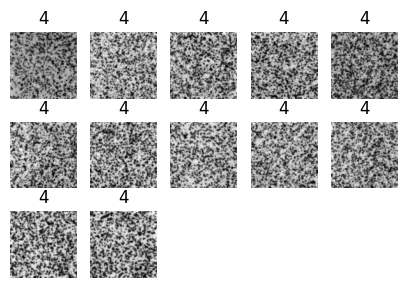

Cluster 5


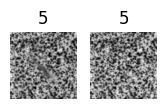

In [ ]:
for cluster_id in np.unique(kmeans2.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans2.labels_==cluster_id
    images = X_train[in_cluster]
    labels = kmeans2.labels_[in_cluster]
    plot_images(images, labels)

#Creat training set with some features

In [ ]:
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file
        #print(image)

        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.

        input_img = x_train[image, :,:]
        img = input_img

        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)/255.0
        df['Pixel_Value'] = pixel_values
        #Append features from current image to the dataset
        image_dataset = pd.concat([image_dataset,df])

        # CANNY EDGE
        img1 = np.uint8(img)
        edges = cv2.Canny(img1, 100, 200)  # Image, min and max values
        edges1 = edges.reshape(-1)/255.0
        df['Canny_Edge'] = edges1

        # GAUSSIAN with sigma
        gaussian_img = nd.gaussian_filter(img, 3)
        gaussian_img1 = gaussian_img.reshape(-1)/255.0
        df['Gaussian'] = gaussian_img1

        # ROBERTS EDGE
        edge_roberts = roberts(img)
        edge_roberts1 = edge_roberts.reshape(-1)
        df['Roberts'] = edge_roberts1

        # SOBEL
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1

        # SCHARR
        edge_scharr = scharr(img)
        edge_scharr1 = edge_scharr.reshape(-1)
        df['Scharr'] = edge_scharr1

    return image_dataset

In [ ]:
features = feature_extractor(X_train)
n_features = features.shape[1]
features = np.expand_dims(features, axis=0)
training_data = np.reshape(features, (X_train.shape[0], -1))

In [ ]:
kmeans3 = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans3.fit(training_data)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [ ]:
print(kmeans3.labels_)

[1 2 2 2 1 1 1 3 1 2 1 2 1 1 2 1 2 2 2 3 3 1 2 1 2 1 2 2 2 1 2 2 2 1 2 2 2
 2 2 2 2 2 3 2 2 1 2 2 2 3 2 1 2 1 2 0 1 5 1 2 1 1 1 2 3 0 3 3 2 1 3 3 3 3
 1 4 3 4 1 3 3 1 1 1 1 3 1 3 4 4 1 1 1 1 3 3 3 4 3 4 3 3 3 1 1 3 4 3 2 3 2
 1 4 3 2 3 1 3 2 3 1 2 1 3 3 3 3 3 3 4 1 1 3 1 3 3 1 2 2 3 1 3 3 3 3 1 3 3
 1 2 3 3 1 2 3 1 4 3 2 2 1 1 3 3 1 3 2 2 2 1 0 1 2 2 2 3 2 1 5 2 3 3 2 3 1
 1 2 3 1 1 1 1 2 3 3 1 3 3 2 3 3 1 1 3 3 2 3 1 3 1 1 3 3 1 1 2 2 1 3 2 1 1
 2 2 3 1 1 2 1 3 2 1 2 2 2 2 3 2 2 1 3 1 2 1 3 2 3 3 3 2 2 2 3 2 3 2 2 1 1
 2 1 2 1 2 1 3 1 3 3 4 4 3 3 3 3 3]


In [ ]:
diff = kmeans2.labels_ == kmeans3.labels_
print(diff)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [ ]:
kmeans3.cluster_centers_[0]

array([131.33333333, 136.        , 135.        , ..., 173.        ,
       168.        , 185.33333333])

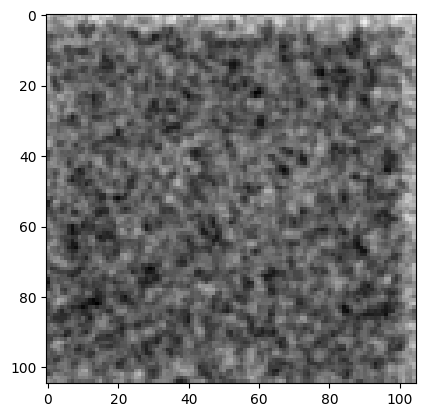

In [ ]:
plt.imshow(kmeans3.cluster_centers_[3].reshape(105,105), cmap="gray")

In [ ]:
kmeans4 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans4.fit(training_data)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
print(kmeans4.labels_)

[1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0
 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
Diff2 = kmeans4.labels_ == kmeans1.labels_
print(Diff2)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

Text(0.5, 1.0, 'Kmeans cluster centroids')

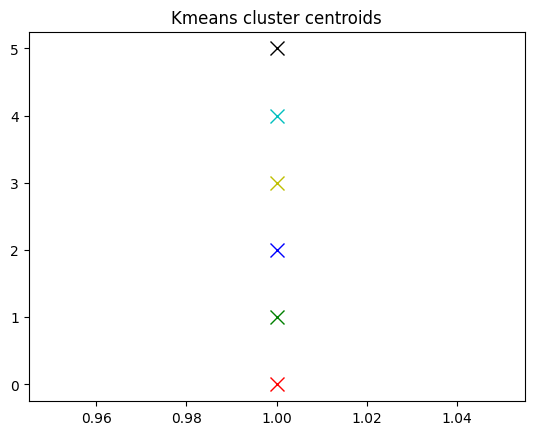

In [ ]:
colors = ['r','g','b', 'y', 'c', 'k']
centroids = kmeans3.predict(kmeans3.cluster_centers_)
for n, y in enumerate(centroids):
    plt.plot(1, y, marker='x', color=colors[n], ms=10)
plt.title('Kmeans cluster centroids')

In [ ]:
print(centroids)

[0 1 2 3 4 5]


Text(0.5, 1.0, 'Points by cluster')

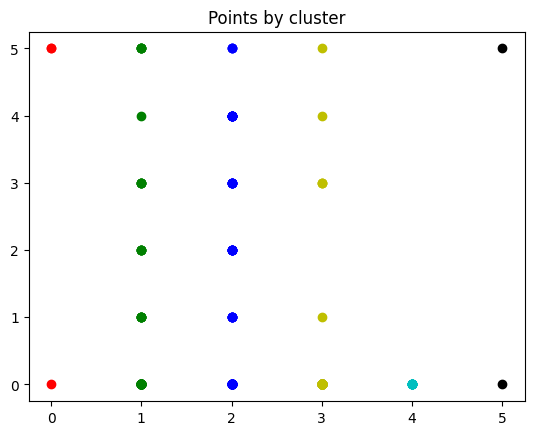

In [ ]:
Z = kmeans3.labels_
n_clusters = 6
for n in range(n_clusters):
    # Filter data points to plot each in turn.
    ys = y_train[ Z==n ]
    xs = kmeans3.labels_[ Z==n ]

    plt.scatter(xs, ys, color=colors[n])

plt.title("Points by cluster")